<a href="https://colab.research.google.com/github/FinancialEngineerLab/finefinance/blob/master/Statistical_Arbitrage_Trading_System_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Systematic Statistical Arbitrage Algorithmic Trading

---


Author : Shin Hyunjin (Quantitative Trader)


In [ ]:
# install library #
!pip install -U finance_datareader
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!./configure --prefix=/usr
!make
!make install
#!pip install Ta-Lib

--2020-12-23 23:23:09--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-12-23 23:23:09--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://managedway.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-12-23 23:23:09--  https://managedway.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving managedway

In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import seaborn
import datetime
import scipy.stats as ss


---


Data Frame Maker


---


In [ ]:
## Data MGT ##
def load_financial_data(ticker, start_date, end_date, output_file):
  try:
    df = pd.read_pickle(output_file)
    print('File data found ... reading data')
  except FileNotFoundError:
    print('File not found ... downloading data')
    df = pd.DataFrame(fdr.DataReader(ticker, start_date, end_date))
    df.to_pickle(output_file)
  return df

def find_cointegrated_pairs(data):
  n = data.shape[1]
  score_matrix = np.zeros((n,n))
  pvalue_matrix = np.ones((n,n))
  keys = data.keys()
  pairs = []
  for i in range(n):
    for j in range(i+1, n):
      S1 = data[keys[i]]
      S2 = data[keys[j]]
      result = coint(S1, S2)
      score = result[0]
      pvalue = result[1]
      score_matrix[i,j] = score
      pvalue_matrix[i, j] = pvalue
      if pvalue <= 0.02: # Significanc level
        pairs.append((keys[i], keys[j]))
  return score_matrix, pvalue_matrix, pairs

def zscore(series):
  return (series - series.mean())/ np.std(series)

# basic concept of stationarity #
def generate_data(params):
  mu = params[0]
  sigma = params[1]
  return np.random.normal(mu, sigma)

def stationarity_test(X, cutoff= 0.02):
  pvalue = adfuller(X)[1]
  if pvlalue < cutoff:
    print('p-value = '+str(pvalue) + 'The Series '+ X.name + ' is likely stationary.')
  else:
    print('p-value = ' + str(pvalue) + 'The Series' + X.name +' is likely nonstationary.')

In [ ]:
### DataFrame ###
ticker_list = ["SPY", "JPY/KRW", "GBP/USD","EUR/USD",
              "JP225","USTEC","EU50","HCEI", "KS200", "DE30",
               "ZG","HG","T", "ZI"] # hangseng no working
              # HO : lean hog, GF :feeder Faddle, HE : lean hog, LE :live Cattle, ZC corn, ZL :soybean oil, RR : rice Oc1:oatmeal, zW: wheat
symbolsids = ticker_list

# time transformation #
today = datetime.datetime.today()
time1 = today + datetime.timedelta(days = -180)
time2 = today + datetime.timedelta(days = -365)
time3 = today + datetime.timedelta(days = -500)
time4 = today + datetime.timedelta(days = -3000)
time1 = datetime.datetime.strftime(time1,"%Y-%m-%d")
time2 = datetime.datetime.strftime(time2,"%Y-%m-%d")
time3 =datetime.datetime.strftime(time3,"%Y-%m-%d")
time4 = datetime.datetime.strftime(time4,"%Y-%m-%d")

## DataFrame Maker ##
#import re
#ticker_list = re.sub('[-=+,#‘|>`\'…》]','',symbolsids)
df_list_wtm = [fdr.DataReader(ticker, time1,)['Close'] for ticker in ticker_list]
df_list_mtm = [fdr.DataReader(ticker, time2)['Close'] for ticker in ticker_list]
df_list_year =[fdr.DataReader(ticker, time3)['Close'] for ticker in ticker_list]
df_list_total =[fdr.DataReader(ticker, time4)['Close'] for ticker in ticker_list]

#ZM , ZS, Platinum: soybean 제외
#df_list_1 = [fdr.DataReader(ticker, "2010-01-01","2010-12-31")['Close'] for ticker in ticker_list]
#df_list_2 = [fdr.DataReader(ticker, "2011-01-01","2011-12-31")['Close'] for ticker in ticker_list]
#df_list_3 =[fdr.DataReader(ticker,  "2012-01-01","2012-12-31")['Close'] for ticker in ticker_list]
#df_list_4 =[fdr.DataReader(ticker,  "2013-01-01","2013-12-31")['Close'] for ticker in ticker_list]
#df_list_5 = [fdr.DataReader(ticker,  "2014-01-01","2014-12-31")['Close'] for ticker in ticker_list]
df_list_6 = [fdr.DataReader(ticker, "2015-01-01","2015-12-31")['Close'] for ticker in ticker_list]
df_list_7 =[fdr.DataReader(ticker,  "2016-01-01","2016-12-31")['Close'] for ticker in ticker_list]
df_list_8 =[fdr.DataReader(ticker, "2017-01-01","2017-12-31")['Close'] for ticker in ticker_list]
df_list_9 =[fdr.DataReader(ticker, "2018-01-01","2018-12-31")['Close'] for ticker in ticker_list]
df_list_10 =[fdr.DataReader(ticker, "2019-01-01","2019-12-31")['Close'] for ticker in ticker_list]
df_list_11 =[fdr.DataReader(ticker, "2020-01-01")['Close'] for ticker in ticker_list]

#df_list_1 = pd.concat(df_list_1,axis=1)
#df_list_2 = pd.concat(df_list_2,axis=1)
#df_list_3 = pd.concat(df_list_3,axis=1)
#df_list_4 = pd.concat(df_list_4,axis=1)
#df_list_5 = pd.concat(df_list_5,axis=1)
df_list_6 = pd.concat(df_list_6,axis=1)
df_list_7 = pd.concat(df_list_7,axis=1)
df_list_8 = pd.concat(df_list_8,axis=1)
df_list_9 = pd.concat(df_list_9,axis=1)
df_list_10 = pd.concat(df_list_10,axis=1)
df_list_11 = pd.concat(df_list_11,axis=1)
df_total = pd.concat([df_list_6,df_list_7,df_list_8,df_list_9,df_list_10, df_list_11])


#df_list = pd.DataFrame(df_list)
df1_raw = pd.concat(df_list_wtm, axis=1)
df2_raw = pd.concat(df_list_mtm, axis=1)
df3_raw = pd.concat(df_list_year, axis=1)
df4_raw = df_total

df1_raw.columns = ticker_list
df1_raw = df1_raw.fillna(method = 'ffill')
df2_raw.columns = ticker_list
df2_raw = df2_raw.fillna(method = 'ffill')
df3_raw.columns = ticker_list
df3_raw = df3_raw.fillna(method = 'ffill')
df4_raw.columns = ticker_list
df4_raw = df4_raw.fillna(method = 'ffill')

#df1 = np.log(df1_raw/df1_raw.shift(1))
#df2 = np.log(df2_raw/df2_raw.shift(1))
##df3 = np.log(df3_raw/df3_raw.shift(1))
#df4 = np.log(df4_raw/df4_raw.shift(1))
df1 = df1_raw
df2 = df2_raw
df3 = df3_raw
df4 = df4_raw

df1.columns = ticker_list
df1 = df1.dropna()
df2.columns = ticker_list
df2 = df2.dropna()
df3.columns = ticker_list
df3 = df3.dropna()
df4.columns = ticker_list
df4 = df4.dropna()
#print(df.head())
#df

score1, pvalues1, pairs1 = find_cointegrated_pairs(df1)
score2, pvalues2, pairs2 = find_cointegrated_pairs(df2)
score3, pvalues3, pairs3 = find_cointegrated_pairs(df3)
score4, pvalues4, pairs4 = find_cointegrated_pairs(df4)

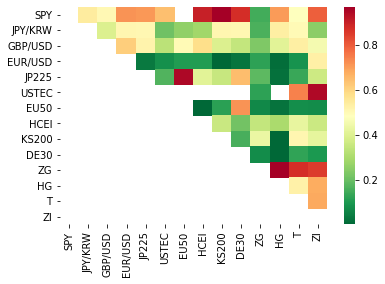

In [ ]:
#pvalues visulization
seaborn.heatmap(pvalues4, xticklabels = symbolsids,
                yticklabels = symbolsids, cmap = 'RdYlGn_r',
                mask = (pvalues4 >= 0.98)) # significance level

In [ ]:
#print(pairs,len(pairs))
result_pairs = list(set(pairs1).intersection(pairs2,pairs3,pairs4))
result_pairs_2 = list(set(pairs2).intersection(pairs3))
result_pairs_4= list(set(pairs4))
result_pairs_3= list(set(pairs3))

result_pairs_short = list(set(pairs1))
result_pairs_mid = list(set(pairs2))

pairs4
#result_pairs_2

[('EUR/USD', 'KS200'),
 ('EUR/USD', 'HG'),
 ('EU50', 'HCEI'),
 ('KS200', 'HG'),
 ('DE30', 'HG')]



---


Spread Calculation


---



Date
2015-01-05    244.26
2015-01-06    239.93
2015-01-07    240.53
2015-01-08    243.94
2015-01-09    246.05
               ...  
2020-09-23    309.64
2020-09-24    302.48
2020-09-25    303.57
2020-09-26    303.57
2020-09-27    303.57
Name: KS200, Length: 1800, dtype: float64

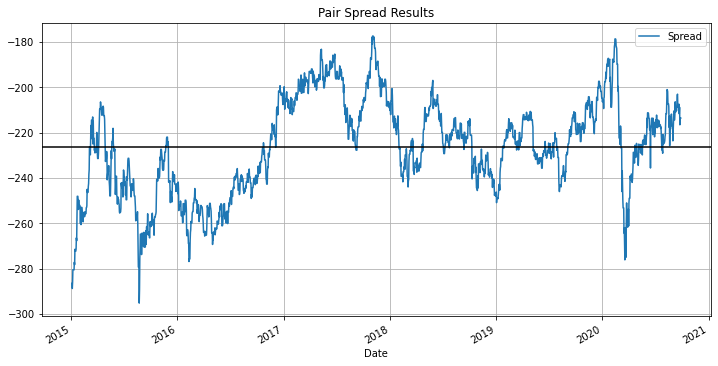

In [ ]:
## Pair Selection Results ##

# 주요 Pair : GOld copper, US10 -Bund10, Copper-US10, JP10Y - Yen
# GBP - KS200
# Palladium, Platinum

ticker_result_1 = "EUR/USD"
ticker_result_2 = "KS200"

S1 = df4[ticker_result_1]
S2 = df4[ticker_result_2]

S1 = S1.dropna()
S2 = S2.dropna()

#S1 = pd.DataFrame(S1)
#S2 = pd.DataFrame(S2)

S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1[ticker_result_1]
b = results.params[1]

# spread #

spread=  S2 - b * S1
spread.plot(figsize = (12,6))
plt.axhline(spread.mean(), color = 'black')
plt.legend(['Spread'])
plt.title('Pair Spread Results')
plt.grid()

df4[ticker_result_2]

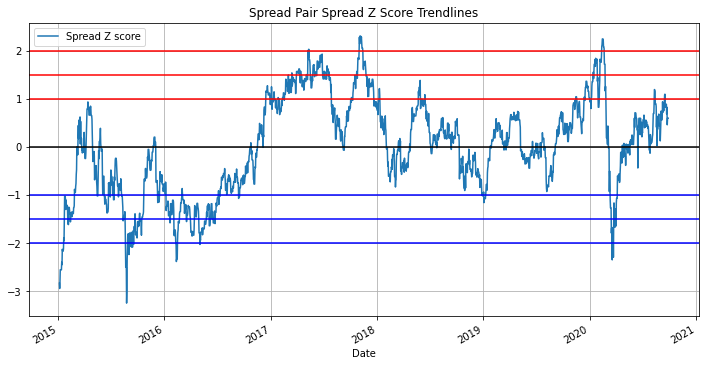

In [ ]:

## Ratio Zscore ##
#ratio =pd.DataFrame(ratio)

zscore(spread).plot(figsize=  (12,6))
plt.legend(['Spread Z score'])
plt.title('Spread Pair Spread Z Score Trendlines')
plt.axhline(2.0, color = 'red')
plt.axhline(1.5, color = 'red')
plt.axhline(1.0, color = 'red')
plt.axhline(-1.0, color = 'blue')
plt.axhline(-1.5, color = 'blue')
plt.axhline(-2.0, color = 'blue')
plt.axhline(0.0, color = 'black')
plt.grid()
plt.show()

In [ ]:
## Pair Selection Results ##

# 주요 Pair : GOld copper, US10 -Bund10, Copper-US10, JP10Y - Yen
# GBP - KS200
# Palladium, Platinum

ticker_result_1 = "GC"
ticker_result_2 = "EUR/USD"

S1 = df4[ticker_result_1]
S2 = df4[ticker_result_2]

S1 = S1.dropna()
S2 = S2.dropna()

#S1 = pd.DataFrame(S1)
#S2 = pd.DataFrame(S2)

S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1[ticker_result_1]
b = results.params[1]

# spread #

spread=  S2 - b * S1
spread.plot(figsize = (12,6))
plt.axhline(spread.mean(), color = 'black')
plt.legend(['Spread'])
plt.title('Pair Spread Results')
plt.grid()

df4[ticker_result_2]

In [ ]:

## Ratio Zscore ##
#ratio =pd.DataFrame(ratio)

zscore(spread).plot(figsize=  (12,6))
plt.legend(['Spread Z score'])
plt.title('Spread Pair Spread Z Score Trendlines')
plt.axhline(2.0, color = 'red')
plt.axhline(1.5, color = 'red')
plt.axhline(1.0, color = 'red')
plt.axhline(-1.0, color = 'blue')
plt.axhline(-1.5, color = 'blue')
plt.axhline(-2.0, color = 'blue')
plt.axhline(0.0, color = 'black')
plt.grid()
plt.show()

In [ ]:
pairs4[1][0]


In [ ]:
## Ratio ##

ratio = S1/S2
#ratio = pd.DataFrame(ratio)
ratio = ratio.dropna()

ratio.plot(figsize=  (12,6))
plt.axhline(ratio.mean(), color = 'black')
plt.legend(['Ratio Spread'])
plt.title('Ratio Pair Spread Results')
plt.grid()

In [ ]:
## Ratio Zscore ##
#ratio =pd.DataFrame(ratio)
ratio = ratio.dropna()

zscore(ratio).plot(figsize=  (12,6))
plt.legend(['Ratio Z score'])
plt.title('Ratio Pair Spread Z Score Trendlines')
plt.axhline(2.0, color = 'red')
plt.axhline(1.5, color = 'red')
plt.axhline(1.0, color = 'red')
plt.axhline(-1.0, color = 'blue')
plt.axhline(-1.5, color = 'blue')
plt.axhline(-2.0, color = 'blue')
plt.axhline(0.0, color = 'black')
plt.grid()
plt.show()

In [ ]:
zscore(ratio).tail(30)
#zscore(ratio).head()

In [ ]:
## DataFrame Maker ##
ticker_list = [ticker_result_1,ticker_result_2]
df_list = [fdr.DataReader(ticker, time3)['Close'] for ticker in ticker_list]
df_list

df = pd.concat(df_list, axis=1)
df.columns = ticker_list
df = df.dropna()
#df

def corr_graph_result(ticker,ticker2, start_date):
  corrdf = df[start_date:]

  ax_0 = corrdf.plot(secondary_y = ticker2, figsize = (10,5))
  plt.title('Graph : Two Ticker Graph')
  plt.grid()
  ax_0.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.show()

corr_graph_result(ticker_result_1, ticker_result_2, time4)
# place orders chart
symbol_1 = df[ticker_result_1]
symbol_2 = df[ticker_result_2]
ratios = symbol_1 / symbol_2
ratios.describe()
ratios.plot()
plt.title("  Ratio")
plt.axhline(ratios.mean())
plt.legend(['Ratios'])
plt.show()

zscore = (ratios - ratios.mean())/ratios.std(ddof=0)
zscore.plot()
plt.title("Ratio Zscore (2Y)")
plt.axhline(zscore.mean(), color = "black")
plt.axhline(1.0, color = "red")
plt.axhline(-1.0, color = "green")

In [ ]:
ratio



---
Trading Signals


---

* setup rules : Prediction Variable(Y) = sign(Ratio - Ratio[1])
* Test : Train = 0.8 : 0.2



---
* Feature Engineering
 - 60 MA of ratio
 - 5 MA of ratio
 - 60 std
 - Z score


In [ ]:
# Test : Train
#print(len(ratio)*0.7)
train = ratio[:int(len(ratio)*0.7)]
test = ratio[int(len(ratio)*0.7):]
train

In [ ]:
#### Technical Analysis with Visulization ####

ratio_mavg5 = train.rolling(window = 5, center = False).mean()
ratio_mavg60 = train.rolling(window = 60, center = False).mean()
std_60 = train.rolling(window = 60, center = False).std()
zscore_60_5 = (ratio_mavg5 - ratio_mavg60)/std_60

df_1 = pd.concat([train, ratio_mavg5, ratio_mavg60], axis =1)
df_1.dropna()
df_1.columns = ['train', 'ratio_mavg5', 'ratio_mavg60']
df_1

In [ ]:
plt.figure(figsize= (12,6))
plt.plot(df_1['train'])
plt.plot(df_1['ratio_mavg5'])
plt.plot(df_1['ratio_mavg60'])
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])
plt.ylabel('Ratio')
plt.title('Ratio, MA5, MA60')
plt.grid()
plt.show()

In [ ]:
#plt.legend(['Rolling Ratio Z score'])
plt.figure(figsize = (20,15))
plt.title('Rolling Ratio Pair Spread Z Score Trendlines')
zscore_60_5.plot()
plt.axhline(2.0, color = 'red', linestyle ='--')
plt.axhline(1.5, color = 'red', linestyle ='--')
plt.axhline(1.0, color = 'red', linestyle ='--')
plt.axhline(0.0, color = 'black', linestyle ='--')
plt.axhline(-1.0, color = 'blue', linestyle ='--')
plt.axhline(-1.5, color = 'blue', linestyle ='--')
plt.axhline(-2.0, color = 'blue', linestyle ='--')
plt.legend(['Rolling Ratio Z score','+2','+1.5','+1.0','0','-1.0','-1.5','-2'])
plt.show()



---


Modeling


---



In [ ]:
plt.figure(figsize = (12,6))

train[150:].plot()
buy = train.copy()
sell = train.copy()

buy[zscore_60_5 > - 1] = 0
sell[zscore_60_5 < 1] = 0
buy[150:].plot(color ='g', linestyle = 'None', marker = '^')
sell[150:].plot(color ='r', linestyle = 'None', marker = '^')

x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio',' Buy','Sell'])
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize = (12,7))

S1 = df4[ticker_result_1].iloc[:int(len(ratio)*0.7)]
S2 = df4[ticker_result_2].iloc[:int(len(ratio)*0.7)]

S1[60:].plot(color = 'b')
S2[60:].plot(color = 'c')
buyR = 0*S1.copy()
sellR = 0 *S2.copy()

# long ratio
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# short ratio
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S2[sell!=0]

# visulaization #
buyR[60:].plot(color = 'g', linestyle = 'None', marker = '^')
sellR[60:].plot(color = 'r', linestyle = 'None', marker = '^')
#
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
plt.legend([ticker_result_1, ticker_result_2, 'Buy', 'Sell'])
plt.grid()
plt.show()



---
Trading System


---




In [ ]:
def trade(S1, S2, window1=60, window2=5):

  #if window length is 0, algro not works
  if (window1==0) or (window2 ==0 ):
    return 0
  
  # mean and std
  ratio= S1/S2
  ma1 = ratio.rolling(window = window1, center = False).mean()
  ma2 = ratio.rolling(window = window2, center = False).mean()
  std = ratio.rolling(window = window2, center = False).std()
  zscore= (ma1 - ma2)/std

  # Money Management #
  money = 0
  countS1 = 0
  countS2 = 0
  for i in range(len(ratio)):
    if zscore[i] < -1:
      money += S1[i] - S2[i] * ratio[i]
      countS1 -= 1
      countS2 += ratio[i]
    elif zscore[i] > 1:
      money -= S1[i] - S2[i] * ratio[i]
      countS1 += 1
      countS2 -= ratio[i]
    
    #exit
    elif abs(zscore[i]) < 0.75:
      money+=S1[i] * countS1 + S2[i] * countS2
      countS1 = 0
      countS2 = 0
  return money

trade(df4[ticker_result_1].iloc[int(len(ratio)*0.7):], df4[ticker_result_2].iloc[int(len(ratio)*0.7):])

In [ ]:
'''
#### initial set trailing stop for long position  
context.longstop = data[stock].price * (1 - .05) # 5% stop-loss price

# update: increase (never decrease) stop-loss  
context.longstop = max( context.longstop, data[stock].price * (1 - .05) ) # 5% target

# test stop-loss  
if data[stock].price < context.longstop:  
   # sell everything  '''

In [ ]:

## DataFrame Maker ##
ticker_list = [ticker_result_1, ticker_result_2]
df_list = [fdr.DataReader(ticker, time3)['Close'] for ticker in ticker_list]
df_list

df = pd.concat(df_list, axis=1)
df.columns = ticker_list
df = df.dropna()
#df

def corr_graph_result(ticker,ticker2, start_date):
  corrdf = df[start_date:]

  ax_0 = corrdf.plot(secondary_y = ticker2, figsize = (10,5))
  plt.title('Graph : Two Ticker Graph')
  plt.grid()
  ax_0.get_legend().set_bbox_to_anchor((0.25, 0.85))
  plt.show()

corr_graph_result(ticker_result_1,ticker_result_2,time3)
# place orders chart
symbol_1 = df[ticker_result_1]
symbol_2 = df[ticker_result_2]
ratios = symbol_1 / symbol_2
ratios.describe()
ratios.plot()
plt.title("Ratio")
plt.axhline(ratios.mean())
plt.legend(['Ratios'])
plt.show()

zscore = (ratios - ratios.mean())/ratios.std(ddof=0)
zscore.plot()
plt.title("Ratio Zscore (1y)")
plt.axhline(zscore.mean(), color = "black")
plt.axhline(1.0, color = "red")
plt.axhline(-1.0, color = "green")

In [ ]:
### Main Trading Strategy : Ratio Zscore ###

# Strategy : Ratios(price1 / price2)'s Zscore
# Enter Position : z score < -1 => short symbol1, long symbol2
# Exit Position : next z score within -1 ~ +1 => long symbol1, short symbol2

# Data Frame #
symbol1_buy=symbol_1.copy()
symbol1_sell=symbol_1.copy()
symbol2_buy=symbol_2.copy()
symbol2_sell=symbol_2.copy()
symbol1_buy[zscore>-1] = 0
symbol2_sell[zscore>-1] = 0
symbol1_sell[zscore<1] = 0
symbol2_buy[zscore<1] = 0

pair_correlation_trading_strategy = pd.DataFrame(index = symbol_1.index)
pair_correlation_trading_strategy['Symbol1_close'] = symbol_1
pair_correlation_trading_strategy['Symbol2_close'] = symbol_2
pair_correlation_trading_strategy['Symbol1_buy'] = np.zeros(len(symbol_1))
pair_correlation_trading_strategy['Symbol1_sell'] = np.zeros(len(symbol_1))
pair_correlation_trading_strategy['Symbol2_buy'] = np.zeros(len(symbol_1))
pair_correlation_trading_strategy['Symbol2_sell'] = np.zeros(len(symbol_1))
pair_correlation_trading_strategy['Delta'] = np.zeros(len(symbol_1))

position = 0
s1_shares = 1
bigpointvalue1 = 100
bigpointvalue2 = 50

for i in np.arange(0, len(symbol_1)):
  s1positions = symbol_1[i] * bigpointvalue1 * s1_shares
  s2positions = symbol_2[i] * bigpointvalue2 * int(s1positions/(symbol_2[i]*bigpointvalue2)) 
  delta_position = s1positions-s2positions

  if not position and symbol1_buy[i] != 0:
    pair_correlation_trading_strategy['Symbol1_buy'][i] = s1positions
    pair_correlation_trading_strategy['Symbol2_sell'][i] = s2positions
    pair_correlation_trading_strategy['Delta'][i] = delta_position
    position = 1
  elif not position and symbol1_sell[i] != 0:
    pair_correlation_trading_strategy['Symbol1_sell'][i] =  s1positions
    pair_correlation_trading_strategy['Symbol2_buy'][i] =  s2positions
    pair_correlation_trading_strategy['Delta'][i] = delta_position
    position = -1
  elif position == -1  and (symbol1_sell[i] ==0 or i == len(symbol_1)-1):
    pair_correlation_trading_strategy['Symbol1_buy'][i] = s1positions
    pair_correlation_trading_strategy['Symbol2_sell'][i] = s2positions
    position = 0
  elif position == 1 and  (symbol1_buy[i]==0 or i == len(symbol_2)-1):
    pair_correlation_trading_strategy['Symbol1_sell'][i] =s1positions
    pair_correlation_trading_strategy['Symbol2_buy'][i] =s2positions
    position = 0

pair_correlation_trading_strategy['Symbol1_position'] =pair_correlation_trading_strategy['Symbol1_buy']-pair_correlation_trading_strategy['Symbol1_sell']
pair_correlation_trading_strategy['Symbol2_position'] =pair_correlation_trading_strategy['Symbol2_buy']-pair_correlation_trading_strategy['Symbol2_sell']
pair_correlation_trading_strategy['Symbol1_position'].cumsum().plot(linestyle = "--")
pair_correlation_trading_strategy['Symbol2_position'].cumsum().plot(linestyle = ":")
pair_correlation_trading_strategy['Total_position'] =pair_correlation_trading_strategy['Symbol1_position'] + pair_correlation_trading_strategy['Symbol2_position']
pair_correlation_trading_strategy['Total_position'].cumsum().plot()
plt.title("Symbol1 and Symbol2 positions")
plt.legend()
plt.show()

In [ ]:
pair_correlation_trading_strategy['Delta'].plot()
plt.title("Delta Position")
plt.show()